`scipy.interpolate` 模块包含了多种插值方法和工具，涵盖了一维插值、多维插值、样条插值等。以下是 `scipy.interpolate` 中的所有主要方法：

### **1. 一维插值 (`interp1d`)**
- `interp1d`：常用的一维插值方法，支持多种插值类型（线性、立方等）。

### **2. 多维插值**
- `griddata`：用于多维数据的插值，支持最近邻、线性、立方插值。
- `Rbf`：径向基函数插值，适用于不规则分布的数据。
- `PchipInterpolator`：一种分段保形插值方法，避免震荡。
- `BarycentricInterpolator`：拉格朗日插值法，适用于小规模数据集。

### **3. 样条插值**
- `splrep`：生成样条插值的参数。
- `splev`：根据 `splrep` 的参数评估样条。
- `UnivariateSpline`：提供样条拟合的更灵活方法。
- `KroghInterpolator`：用于拉格朗日插值的特殊方法，基于每个点的导数信息。
- `BesselInterpolator`：Bessel插值。
- `InterpolatedUnivariateSpline`：样条插值，自动平滑的版本。

### **4. 边界插值**
- `PPoly`：一个更通用的多项式插值对象，用于处理插值和拟合。
- `PPoly.from_derivatives`：基于一阶导数或高阶导数创建多项式。

### **5. 插值工具**
- `interpolate`：插值工具的通用接口，通常与 `scipy.integrate` 中的微分方程结合使用。
- `interp2d`：二维插值，可以进行网格插值，提供线性或立方插值。
- `RegularGridInterpolator`：用于规则网格上的多维插值。
- `InterpolatedND`：多维插值工具，适用于多维数据。

### **6. 插值方法**
- `interpolate.interp1d`：用于一维数据的插值。
- `interpolate.splines`：实现样条插值的工具类。
  
---

### 主要方法和功能总结：

| 插值方法                          | 描述 |
|-----------------------------------|------|
| **一维插值**                      |      |
| `interp1d`                        | 通过指定的插值类型进行一维插值。 |
| **多维插值**                      |      |
| `griddata`                        | 多维数据的插值。 |
| `Rbf`                             | 径向基函数插值，适用于不规则数据。 |
| `PchipInterpolator`               | 保形插值方法，避免震荡。 |
| `BarycentricInterpolator`         | 拉格朗日插值法。 |
| **样条插值**                      |      |
| `splrep`                          | 生成样条插值的参数。 |
| `splev`                           | 根据 `splrep` 的结果评估样条插值。 |
| `UnivariateSpline`                | 样条插值，提供更多拟合选项。 |
| `KroghInterpolator`               | 拉格朗日插值，支持导数信息。 |
| `BesselInterpolator`              | Bessel插值。 |
| `InterpolatedUnivariateSpline`    | 自动平滑样条插值。 |
| **边界插值**                      |      |
| `PPoly`                           | 更通用的多项式插值工具。 |
| `PPoly.from_derivatives`          | 从导数创建多项式。 |
| **通用插值**                      |      |
| `interpolate`                     | 插值的通用接口。 |
| `interp2d`                        | 二维插值工具。 |
| `RegularGridInterpolator`         | 多维网格插值。 |
| `InterpolatedND`                  | 多维插值。 |

---

这些方法和工具能够帮助我们处理各种插值需求，适用于不同维度、不同类型的数据。

## 一维插值

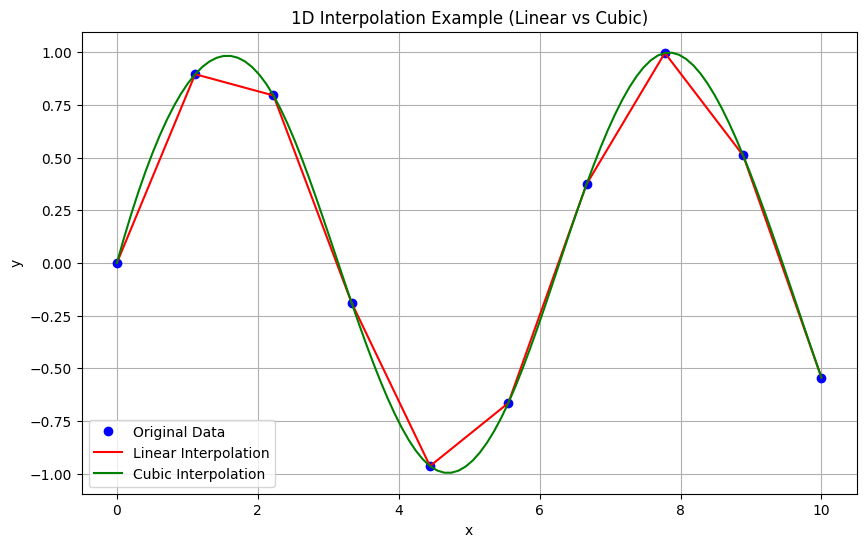

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 示例数据
x = np.linspace(0, 10, 10)  # 输入的自变量
y = np.sin(x)  # 对应的因变量（这里使用正弦函数）

# 使用线性插值
linear_interp = interp1d(x, y, kind='linear')

# 使用立方插值
cubic_interp = interp1d(x, y, kind='cubic')

# 创建插值点
xnew = np.linspace(0, 10, 100)  # 用于插值的新x值

# 计算插值结果
ynew_linear = linear_interp(xnew)
ynew_cubic = cubic_interp(xnew)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data', color='blue')  # 原始数据
plt.plot(xnew, ynew_linear, label='Linear Interpolation', color='red')  # 线性插值
plt.plot(xnew, ynew_cubic, label='Cubic Interpolation', color='green')  # 立方插值
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('1D Interpolation Example (Linear vs Cubic)')
plt.grid(True)
plt.show()


## 多维插值 (griddata, Rbf, interp2d, RegularGridInterpolator)

### griddata 示例
griddata 是用于二维数据插值的一种方法，可以用不同的插值方法来估计点之间的函数值。它适用于不规则的数据点集。

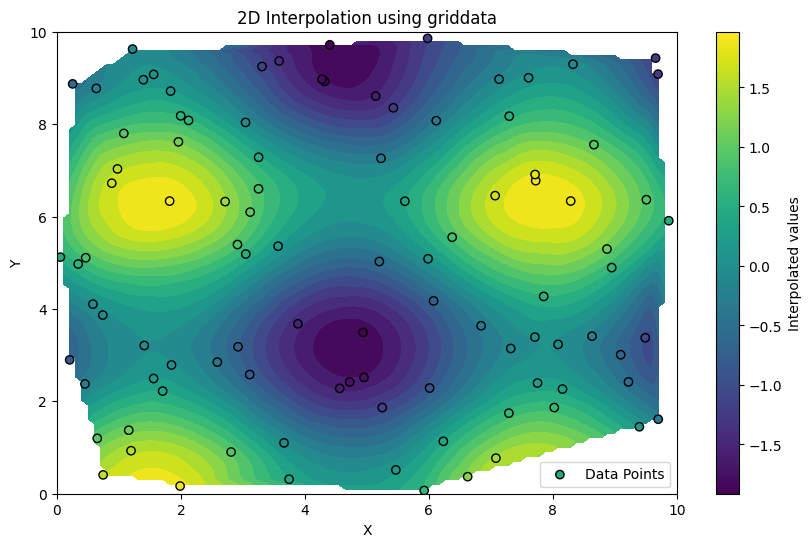

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 生成示例数据
np.random.seed(42)
x = np.random.rand(100) * 10
y = np.random.rand(100) * 10
z = np.sin(x) + np.cos(y)

# 创建一个网格
grid_x, grid_y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))

# 使用 griddata 进行插值
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# 绘制插值结果
plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, grid_z, 20, cmap='viridis')
plt.scatter(x, y, c=z, edgecolors='k', marker='o', label='Data Points')
plt.title('2D Interpolation using griddata')
plt.colorbar(label='Interpolated values')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### Rbf（径向基函数插值）示例
Rbf（Radial Basis Function）插值是使用径向基函数进行插值的技术。它适用于多维插值，常用于复杂的空间插值问题。

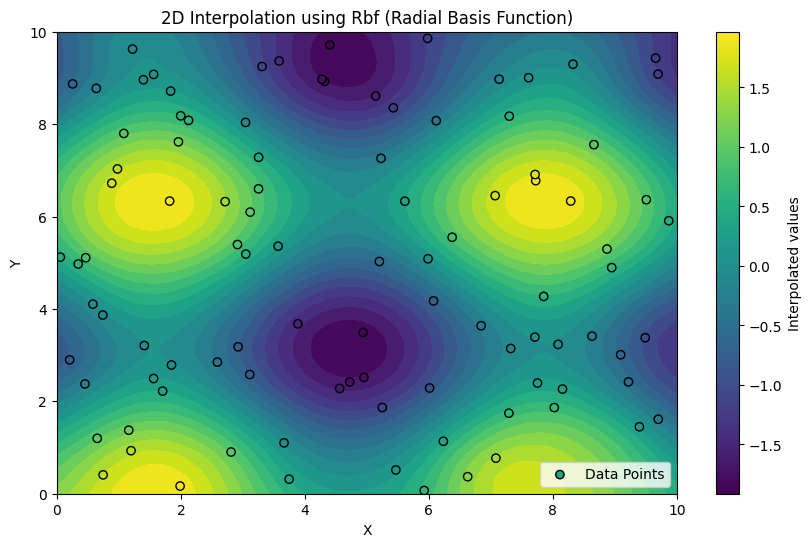

In [3]:
from scipy.interpolate import Rbf

# 使用相同的数据
rbf = Rbf(x, y, z, function='multiquadric')

# 创建一个网格
grid_z_rbf = rbf(grid_x, grid_y)

# 绘制插值结果
plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, grid_z_rbf, 20, cmap='viridis')
plt.scatter(x, y, c=z, edgecolors='k', marker='o', label='Data Points')
plt.title('2D Interpolation using Rbf (Radial Basis Function)')
plt.colorbar(label='Interpolated values')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### interp2d 示例
interp2d 是用于二维数据插值的方法，提供不同的插值方法（如线性、二次、立方等）。

C:\Users\epiph\AppData\Local\Temp\ipykernel_19388\1324446007.py:4: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interp2d(x, y, z, kind='cubic')
C:\Users\epiph\AppData\Local\Temp\ipykernel_19388\1324446007.py:7: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D da

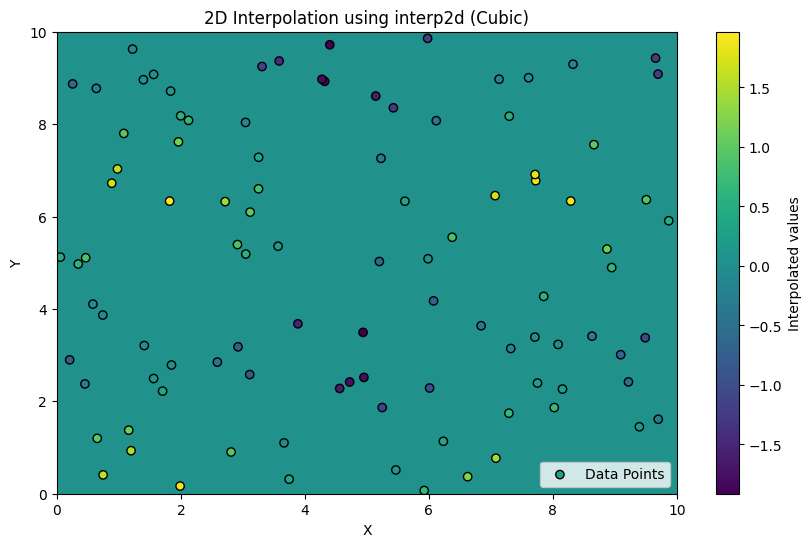

In [4]:
from scipy.interpolate import interp2d

# 使用相同的网格数据
f = interp2d(x, y, z, kind='cubic')

# 创建新的网格
grid_z_interp2d = f(grid_x[:, 0], grid_y[0, :])

# 绘制插值结果
plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, grid_z_interp2d, 20, cmap='viridis')
plt.scatter(x, y, c=z, edgecolors='k', marker='o', label='Data Points')
plt.title('2D Interpolation using interp2d (Cubic)')
plt.colorbar(label='Interpolated values')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### RegularGridInterpolator 示例
RegularGridInterpolator 是用于规则网格数据的插值方法，适用于已知规则网格上的数据。

In [5]:
from scipy.interpolate import RegularGridInterpolator

# 定义规则网格
x = np.linspace(0, 10, 5)
y = np.linspace(0, 10, 5)
z = np.sin(x[:, None]) + np.cos(y[None, :])

# 创建插值器
interpolator = RegularGridInterpolator((x, y), z)

# 进行插值
points = np.array([[1, 1], [5, 5], [9, 9]])
interpolated_values = interpolator(points)

# 输出插值结果
print("Interpolated values:", interpolated_values)


Interpolated values: [ 0.51893141 -0.67526209 -0.31600147]


### **总结：**

- **`griddata`**：适用于任意分布的点集，通过选择插值方法（如线性、立方）对散点数据进行插值。
- **`Rbf`**：使用径向基函数对数据进行插值，适用于不规则数据集，支持多种基函数（如多重二次、高斯、逆多项式等）。
- **`interp2d`**：专门用于规则网格的二维插值，支持多种插值方法（如线性、二次、立方等）。
- **`RegularGridInterpolator`**：适用于规则网格数据的插值，提供高效的插值方法，适合需要快速插值的场景。

---
## 样条插值 (splrep, splev, UnivariateSpline, PchipInterpolator, Akima1DInterpolator, BarycentricInterpolator)

### splrep 和 splev 示例
splrep 用于计算样条插值的逼近（通过 B样条），splev 用于在计算后的样条上进行评估。

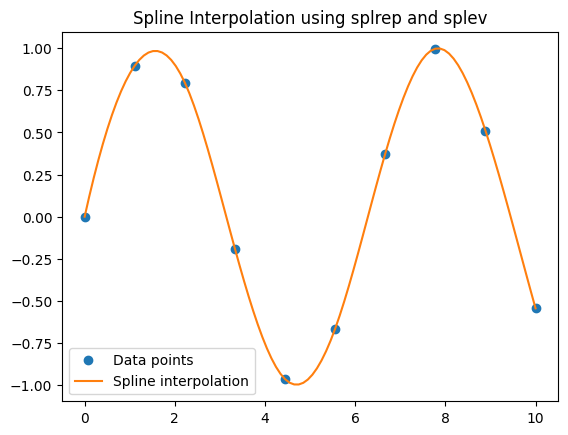

In [6]:
from scipy.interpolate import splrep, splev
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
x = np.linspace(0, 10, 10)
y = np.sin(x)

# 使用 splrep 计算样条逼近
spl = splrep(x, y)

# 使用 splev 在新数据点上进行评估
x_new = np.linspace(0, 10, 100)
y_new = splev(x_new, spl)

# 绘制结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new, '-', label='Spline interpolation')
plt.title('Spline Interpolation using splrep and splev')
plt.legend()
plt.show()


### UnivariateSpline 示例
UnivariateSpline 是一种单变量的 B 样条插值，它能自动选择样条的平滑度（由 s 控制）。它适合用于平滑数据或插值。

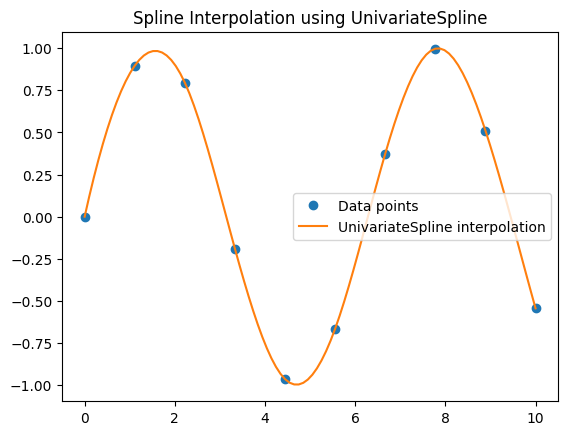

In [7]:
from scipy.interpolate import UnivariateSpline

# 使用相同的示例数据
spline = UnivariateSpline(x, y, s=0)  # s=0 表示插值而非平滑

# 生成新数据点的插值结果
y_new_spline = spline(x_new)

# 绘制结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_spline, '-', label='UnivariateSpline interpolation')
plt.title('Spline Interpolation using UnivariateSpline')
plt.legend()
plt.show()


### PchipInterpolator 示例
PchipInterpolator 是分段立方 Hermite 插值，它保留了原数据的单调性，是一种能够较好避免震荡的插值方法。

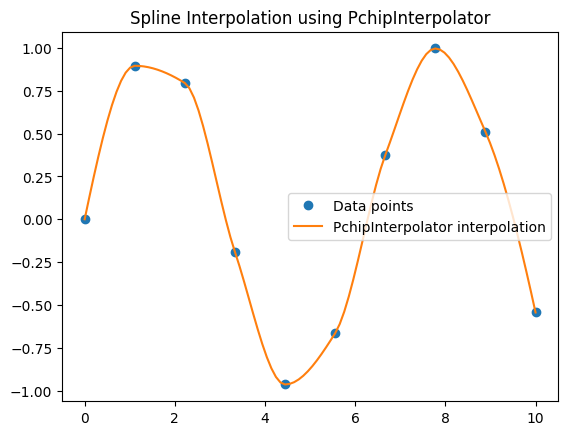

In [8]:
from scipy.interpolate import PchipInterpolator

# 使用 PchipInterpolator 进行插值
pchip_interp = PchipInterpolator(x, y)

# 生成新数据点的插值结果
y_new_pchip = pchip_interp(x_new)

# 绘制结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_pchip, '-', label='PchipInterpolator interpolation')
plt.title('Spline Interpolation using PchipInterpolator')
plt.legend()
plt.show()


### Akima1DInterpolator 示例
Akima1DInterpolator 是 Akima 插值，它是一种分段插值方法，用于处理数据集中的“拐点”，避免震荡。

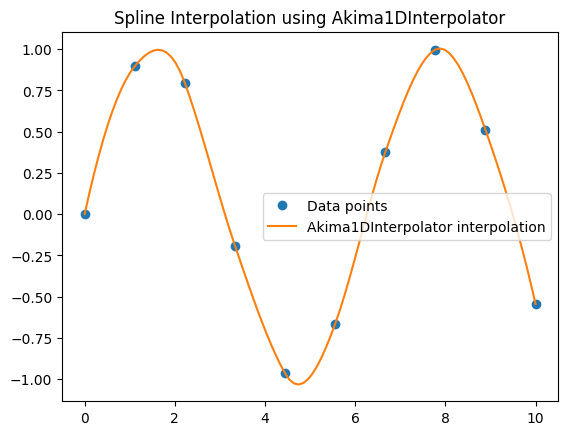

In [9]:
from scipy.interpolate import Akima1DInterpolator

# 使用 Akima1DInterpolator 进行插值
akima_interp = Akima1DInterpolator(x, y)

# 生成新数据点的插值结果
y_new_akima = akima_interp(x_new)

# 绘制结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_akima, '-', label='Akima1DInterpolator interpolation')
plt.title('Spline Interpolation using Akima1DInterpolator')
plt.legend()
plt.show()


### BarycentricInterpolator 示例
BarycentricInterpolator 是一种基于拉格朗日插值法的插值方法，适用于不规则的数据点集。

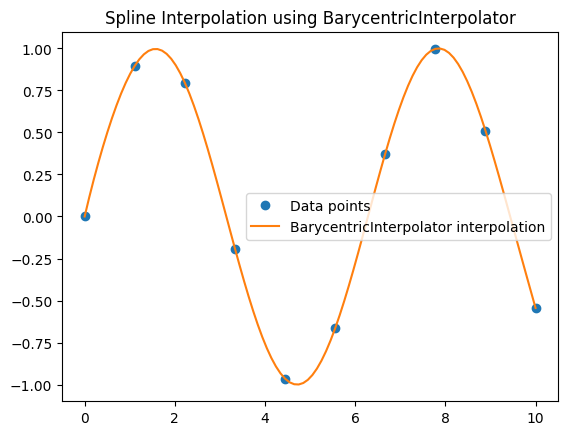

In [10]:
from scipy.interpolate import BarycentricInterpolator

# 使用 BarycentricInterpolator 进行插值
barycentric_interp = BarycentricInterpolator(x, y)

# 生成新数据点的插值结果
y_new_barycentric = barycentric_interp(x_new)

# 绘制结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_barycentric, '-', label='BarycentricInterpolator interpolation')
plt.title('Spline Interpolation using BarycentricInterpolator')
plt.legend()
plt.show()


### KroghInterpolator 示例
KroghInterpolator 是基于多项式的插值方法，它通过考虑数据点的所有信息来选择一个最合适的多项式。

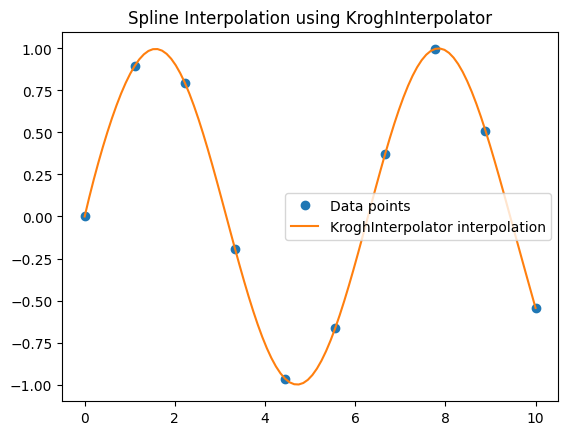

In [11]:
from scipy.interpolate import KroghInterpolator

# 使用 KroghInterpolator 进行插值
krogh_interp = KroghInterpolator(x, y)

# 生成新数据点的插值结果
y_new_krogh = krogh_interp(x_new)

# 绘制结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_krogh, '-', label='KroghInterpolator interpolation')
plt.title('Spline Interpolation using KroghInterpolator')
plt.legend()
plt.show()


### **总结：**
- **`splrep` 和 `splev`**：用于通过 B 样条逼近来进行插值，适用于平滑的数据集。
- **`UnivariateSpline`**：基于 B 样条的插值方法，支持平滑控制，适用于需要插值的平滑数据。
- **`PchipInterpolator`**：用于单调数据的插值，避免插值过程中的震荡。
- **`Akima1DInterpolator`**：另一种处理拐点的插值方法，避免震荡。
- **`BarycentricInterpolator`**：基于拉格朗日插值法的插值方法，适用于不规则的数据点。
- **`KroghInterpolator`**：多项式插值方法，通过考虑数据点的信息来选择最合适的插值函数。


## 边界插值

### BarycentricInterpolator 边界插值
BarycentricInterpolator 是基于拉格朗日插值法的插值方法，它特别适合不规则的数据点，能够处理边界插值时的特殊情况。

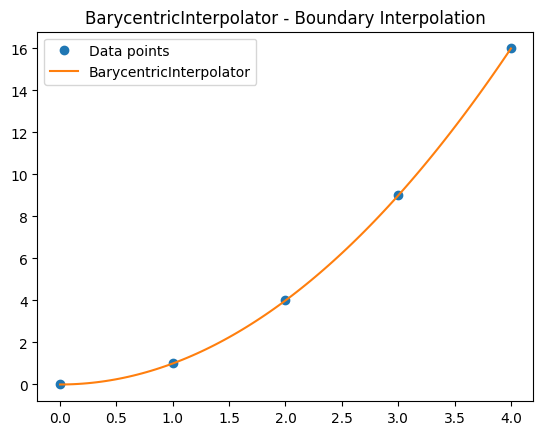

In [12]:
from scipy.interpolate import BarycentricInterpolator
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])

# 使用 BarycentricInterpolator 进行插值
barycentric_interp = BarycentricInterpolator(x, y)

# 创建新数据点进行插值
x_new = np.linspace(0, 4, 100)
y_new_barycentric = barycentric_interp(x_new)

# 绘制插值结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_barycentric, '-', label='BarycentricInterpolator')
plt.title('BarycentricInterpolator - Boundary Interpolation')
plt.legend()
plt.show()


### PchipInterpolator 边界插值
PchipInterpolator 是分段立方 Hermite 插值，它保持数据的单调性，避免插值过程中的震荡。这使得它在边界插值时特别有效。

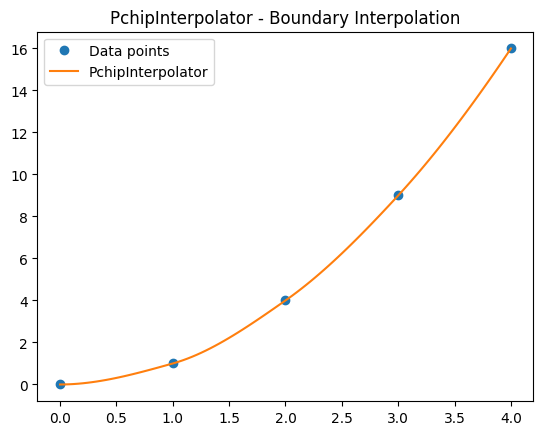

In [13]:
from scipy.interpolate import PchipInterpolator
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])

# 使用 PchipInterpolator 进行插值
pchip_interp = PchipInterpolator(x, y)

# 创建新数据点进行插值
x_new = np.linspace(0, 4, 100)
y_new_pchip = pchip_interp(x_new)

# 绘制插值结果
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_new_pchip, '-', label='PchipInterpolator')
plt.title('PchipInterpolator - Boundary Interpolation')
plt.legend()
plt.show()


### **总结**：

- **`BarycentricInterpolator`**：基于拉格朗日插值法，适用于不规则数据，能够有效处理边界插值。
- **`PchipInterpolator`**：通过分段立方 Hermite 插值保持单调性，适合于边界插值时避免震荡。

这两种方法的特点和优缺点不同，选择时要根据数据的性质来决定使用哪种插值方法。

## 通用插值

### InterpolatedND - 多维插值（scipy版本限制）
InterpolatedND 是一个用于处理任意维度的插值工具。

In [15]:
# from scipy.interpolate import InterpolatedND
# import numpy as np
# import matplotlib.pyplot as plt

# # 示例数据：二维插值
# x = np.array([0, 1, 2, 3])
# y = np.array([0, 1, 2, 3])
# X, Y = np.meshgrid(x, y)
# Z = X**2 + Y**2

# # 使用 InterpolatedND 进行多维插值
# interp_nd = InterpolatedND(X, Y, Z)

# # 插值新点
# x_new = np.array([1.5])
# y_new = np.array([1.5])
# result = interp_nd(x_new, y_new)

# print(f'Interpolated value at (1.5, 1.5): {result}')
